<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-libraries/spkit" data-toc-modified-id="Importing-libraries/spkit-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing libraries/spkit</a></span></li><li><span><a href="#14-channel-EEG-sample-signas" data-toc-modified-id="14-channel-EEG-sample-signas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>14 channel EEG sample signas</a></span></li><li><span><a href="#Artifact-removal-using-ICA" data-toc-modified-id="Artifact-removal-using-ICA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Artifact removal using ICA</a></span></li><li><span><a href="#Smaller-segment" data-toc-modified-id="Smaller-segment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Smaller segment</a></span></li><li><span><a href="#Doc" data-toc-modified-id="Doc-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Doc</a></span></li></ul></div>

# Importing libraries/spkit

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import spkit as sp
from spkit.data import load_data
sp.__version__

'0.0.9.3'

# 14 channel EEG sample signas

In [4]:
X,ch_names = load_data.eegSample()
fs = 128

Xf = sp.filter_X(X,band=[0.5], btype='highpass',fs=fs,verbose=0).T
Xf.shape

(2048, 14)

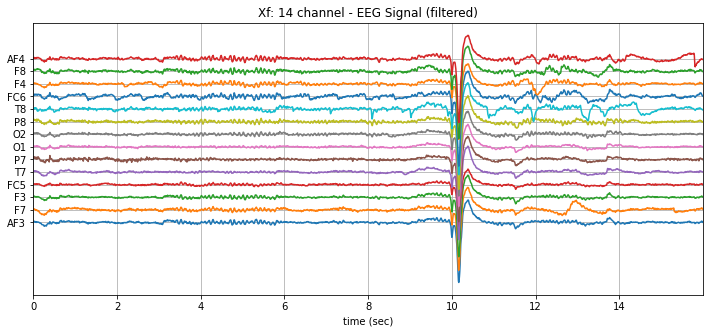

In [5]:
t = np.arange(Xf.shape[0])/fs
plt.figure(figsize=(12,5))
plt.plot(t,Xf+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf: 14 channel - EEG Signal (filtered)')
plt.show()

# Artifact removal using ICA

In [6]:
XR = sp.eeg.ICA_filtering(Xf.copy(),verbose=1,kur_thr=2,corr_thr=0.8,winsize=128)
XR.shape

ICA Artifact Removal : extended-infomax
100.05%|##################################################|2112\2113|
Done..


(2048, 14)

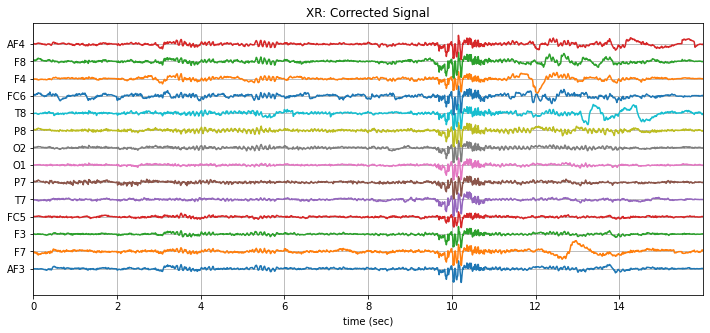

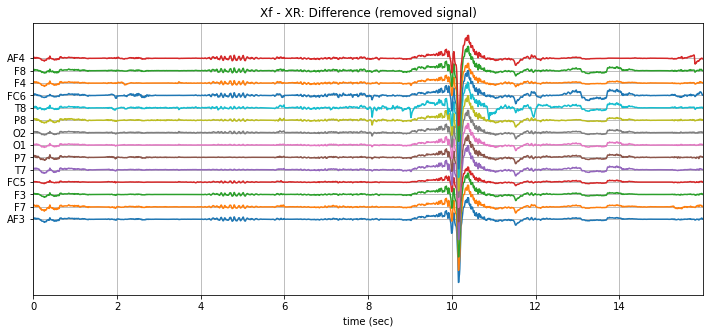

In [7]:
plt.figure(figsize=(12,5))
plt.plot(t,XR+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(t,(Xf-XR)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference (removed signal)')
plt.show()

# Smaller segment

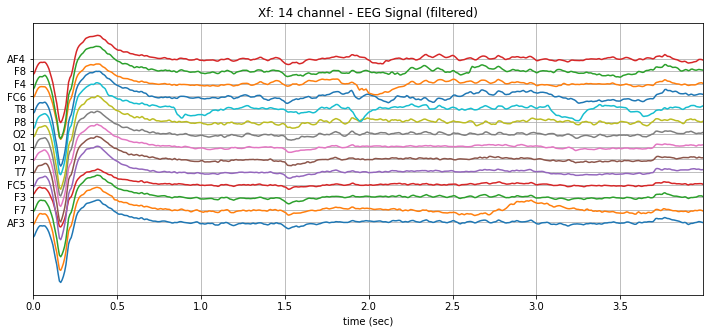

In [12]:
Xf1 = Xf[128*10:128*14].copy()

t = np.arange(Xf1.shape[0])/fs
plt.figure(figsize=(12,5))
plt.plot(t,Xf1+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf: 14 channel - EEG Signal (filtered)')
plt.show()

In [16]:
XR1 = sp.eeg.ICA_filtering(Xf1.copy(),verbose=1,kur_thr=2,corr_thr=0.8,winsize=128*2)
XR1.shape

ICA Artifact Removal : extended-infomax
100.16%|##################################################|640\641|
Done..


(512, 14)

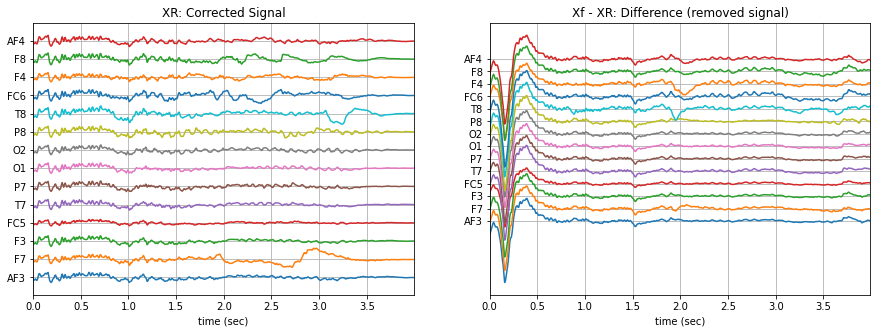

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t,XR1+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('XR: Corrected Signal')

plt.subplot(122)
plt.plot(t,(Xf1-XR1)+np.arange(-7,7)*200)
plt.xlim([t[0],t[-1]])
plt.xlabel('time (sec)')
plt.yticks(np.arange(-7,7)*200,ch_names)
plt.grid()
plt.title('Xf - XR: Difference (removed signal)')
plt.show()

# Doc

In [9]:
help(sp.eeg.ICA_filtering)

Help on function ICA_filtering in module eeg.artifact_correction:

ICA_filtering(X, winsize=128, ICA_method='extended-infomax', kur_thr=2, corr_thr=0.8, AF_ch_index=[0, 13], F_ch_index=[1, 2, 11, 12], verbose=True, window=['hamming', True], hopesize=None, winMeth='custom')
    input
    ------
    X: input signal (n,ch) with n samples and ch channels
    winsize:  window size to process, if None, entire signal is used at once
    ICAMed = ['fastICA','infomax','extended-infomax','picard']
    
    (1) Kurtosis based artifacts - mostly for motion artifacts
    ------------------------------------------------------
    kur_thr: (default 2) threshold on kurtosis of IC commponents to remove, higher it is, more peaky component is selected
           : +ve int value
    (2) Correlation Based Index (CBI) for eye movement artifacts
    --------------------------------------------------------
    for applying CBI method, index of prefrontal (AF - First Layer of electrodes towards frontal lobe) a